In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from main import main
from evolution.chromosome import *
from utils.data_manipulators import *
from problems.knapsack_generator import knapsack_generator
%matplotlib notebook

In [56]:
def get_fitness(results):
    fitnesses = np.zeros_like(results)
    for i, rep in enumerate(results):
        for j, gen in enumerate(rep):
            if gen.any() is not None:
                fitnesses[i, j, :] = Chromosome.fitness_to_numpy(gen)
    return fitnesses

def time_concat(time_hist):
    for i in range(1, len(time_hist)):
        time_hist[i] += time_hist[i-1]
    return time_hist

In [3]:
class args:
    tsamples = 10
    src_version = 'v2'
    stop_condition = True
    reps = 30
    transfer = True
    delta = 2
    buildmodel = False
    s1_psize = 50
    s2_psize = 1
    sample_size = 1000
    sub_sample_size = 50
    version = 'v2'
    mutation_strength = 1
    injection_type = 'full'
    to_repititon_num = 10
    selection_version = 'v1'
    c = np.sqrt(1.5)
    efficient_version = True

In [ ]:
now = time()
results_v2_selv1_tor10_efficient = main(args)
end = time()  
print("duration: ", str((end - now)/60))

In [ ]:
args.efficient_version = False
now = time()
results_v2_selv1_tor10 = main(args)
end = time()  
print("duration: ", str((end - now)/60))

In [ ]:
args.version = 'ea_time_scale'
now = time()
results_ea = main(args)
end = time()  
print("duration: ", str((end - now)/60))

In [ ]:
args.version = 'to'
now = time()
results_to = main(args)
end = time()  
print("duration: ", str((end - now)/60))

In [46]:
fitness_v2_selv1_tor10 = get_fitness(results_v2_selv1_tor10[0]).mean(axis=0).mean(axis=1)
fitness_v2_selv1_tor10_efficient = get_fitness(results_v2_selv1_tor10_efficient[0]).mean(axis=0).mean(axis=1)
fitness_ea = results_ea[0].mean(axis=0).mean(axis=1)
fitness_to = results_to[0].mean(axis=0).mean(axis=1)

In [57]:
time_v2_selv1_tor10 = time_concat(results_v2_selv1_tor10[3].mean(axis=0).mean(axis=1))
time_v2_selv1_tor10_efficient = time_concat(results_v2_selv1_tor10_efficient[3].mean(axis=0).mean(axis=1))
time_ea = time_concat(results_ea[1].mean(axis=0))
time_to = time_concat(results_to[2].mean(axis=0))

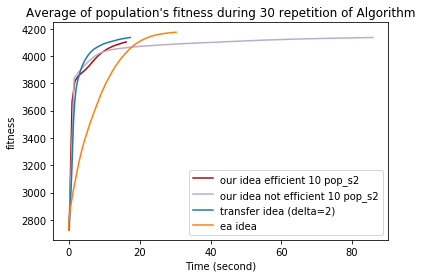

In [61]:
plt.plot(time_v2_selv1_tor10_efficient, fitness_v2_selv1_tor10_efficient, '#aa0a0a', label='our idea efficient 10 pop_s2')
plt.plot(time_v2_selv1_tor10, fitness_v2_selv1_tor10, '#bcabcc', label='our idea not efficient 10 pop_s2')
plt.plot(time_to, fitness_to,label='transfer idea (delta=2)')
plt.plot(time_ea, fitness_ea,label='ea idea')
plt.legend()
plt.xlabel('Time (second)')
plt.ylabel('fitness')
plt.title("Average of population's fitness during 30 repetition of Algorithm")
plt.show()